In [8]:
import os
import pandas as pd

In [9]:
df = pd.read_json(os.path.join('data','martinus_vyslo.json'))

In [14]:
print(f"""martinus_vyslo.json:
- autorstva: {df['M_autorstvo'].nunique()}
- titulů: {df['M_titul'].nunique()}
- ISBN: {df['M_isbn'].nunique()}""")

martinus_vyslo.json:
- autorstva: 7018
- titulů: 11171
- ISBN: 11041


In [10]:
df

,M_titul,M_autorstvo,M_anotace,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,M_jazyk,...,M_účel_knihy,M_audiokniha,M_vydání,M_originální_název,M_překlad,M_ostatní,M_předběžné_datum_vydání,M_příloha,M_jazyková_úroveň,M_knižní_předloha
0,Jindřich Chalupecký. Texty a kontexty kritika ...,Tomáš Pospiszyl,Kritik a teoretik umění Jindřich Chalupecký (1...,396.0,brožovaná vazba,150×220 mm,513 g,9788088366478,2023,čeština,...,None,None,None,None,None,None,NaN,None,None,None
1,Hra s formami 2,Eduardo Duran,"Vedomie je individuálne vnímanie, ktoré má kaž...",404.0,brožovaná vazba,135×205 mm,510 g,9798373986052,2023,slovenština,...,None,None,None,None,None,None,NaN,None,None,None
2,"Práce, odvody a mzdy bez chyb, pokut a penále ...",None,Firemní školky jako benefit - Někteří zaměstna...,NaN,brožovaná vazba,None,None,9771801993457,2024,čeština,...,None,None,None,None,None,None,NaN,None,None,None
3,Daně v podnikání,Alena Vančurová Hana Zídková,"Publikace vychází již podruhé, v aktualizované...",368.0,brožovaná vazba,155×235 mm,544 g,9788076763593,2022,čeština,...,None,None,None,None,None,None,NaN,None,None,None
4,Budoucnost začíná teď,Lukáš Bujna,Během pandemie covidu si husitský farář a básn...,248.0,brožovaná vazba,150×210 mm,None,9788090788145,2023,čeština,...,None,None,None,None,None,None,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709,V severnom vetre čítaš správy ďaleké,Martin Odler,Kniha V severnom vetre čítaš správy ďaleké je ...,208.0,pevná vazba,154×226 mm,490 g,9788082450296,2023,slovenština,...,None,None,None,None,None,None,NaN,None,None,None
11710,Louka a spousta tance,Jakub Klikar,"Tato básnická sbírka obsahující třicet básní, ...",40.0,brožovaná vazba,140×210 mm,76 g,9788075682079,2020,čeština,...,None,None,None,None,None,None,NaN,None,None,None
11711,Z čeho je den,Dominika Prejdová,Román Dominiky Prejdové popisuje dynamiku a mi...,264.0,pevná vazba,135×208 mm,40 g,9788024275772,2021,čeština,...,None,None,None,None,None,None,NaN,None,None,None
11712,Krvavý Žižkov\n Novinka,Martin Reiner,"Krvavý Žižkov je antologie, která má svého pře...",256.0,pevná vazba,150×210 mm,None,9788072279012,2024,čeština,...,None,None,None,None,None,None,NaN,None,None,None


In [4]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_počet_stran', 'M_vazba',
       'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání', 'M_jazyk',
       'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena', 'M_datum',
       'M_série', 'M_díl', 'M_edice', 'M_pro_koho', 'M_e-kniha', 'M_přečtená',
       'M_věkové_doporučení', 'M_styl', 'M_ilustrace', 'M_účel_knihy',
       'M_audiokniha', 'M_vydání', 'M_originální_název', 'M_překlad',
       'M_ostatní', 'M_předběžné_datum_vydání', 'M_příloha',
       'M_jazyková_úroveň', 'M_knižní_předloha'],
      dtype='object')

In [5]:
df['M_hmotnost'] = pd.to_numeric(df['M_hmotnost'].apply(lambda x: str(x).replace(" g","")), errors="coerce")

In [6]:
def na_seznam(x):
    x = str(x)[1:-1].replace("'","")
    x = x.split(", ")
    return [y.strip() for y in x]

In [7]:
df['M_kategorizace'] = df['M_kategorizace'].apply(lambda x: na_seznam(x))

In [8]:
df.groupby("M_autorstvo")['M_hmotnost'].median().nlargest(60)

M_autorstvo
Adéla Ebersonová Lucie Doležalová Michal Dragoun                                                       5110.0
Lubomír Sršeň                                                                                          4642.0
Karel Müller Michal Šimůnek Karel Podolský                                                             4459.0
Tomáš Míček                                                                                            4366.0
Slavena Rohlíková                                                                                      4338.0
Miroslav Zavoral                                                                                       4288.0
Miloslav Jenšík                                                                                        4200.0
Helena Březinová Jana Bureš Víchová Milena Bravermanová                                                4154.0
Marcela Titzlová                                                                                       4069.

In [9]:
kategorizace = df.explode("M_kategorizace")
kategorizace.groupby("M_kategorizace")['M_hmotnost'].median().nlargest()

M_kategorizace
Urologie                           1448.5
Praktické lékařství pro dospělé    1380.0
Veterinární lékařství              1375.0
Úrazová chirurgie a ortopedie      1222.0
Oftalmologie a otolaryngologie     1186.0
Name: M_hmotnost, dtype: float64

In [10]:
kategorizace.groupby('M_kategorizace').size().nlargest()

M_kategorizace
Knihy                           20982
Beletrie                         9527
Odborné a naučné                 8399
Humanitní a společenské vědy     3594
Společenská beletrie             1981
dtype: int64

In [17]:
df[df['M_autorstvo'].str.contains('Prchal',na=False)]

,M_titul,M_autorstvo,M_anotace,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,M_jazyk,...,M_účel_knihy,M_audiokniha,M_vydání,M_originální_název,M_překlad,M_ostatní,M_předběžné_datum_vydání,M_příloha,M_jazyková_úroveň,M_knižní_předloha
980,Vytváření konvertity,Hana Ferencová Iveta Coufalová Radmila Prchal ...,"Cílem autorského kolektivu bylo zjišťovat, jak...",484.0,pevná vazba,145×208 mm,680.0,9788074228056,2022,čeština,...,None,None,None,None,None,None,NaN,None,None,None
1669,"Odpadlíci, noví křesťané a obyvatelé zpapeženělí",Radmila Prchal Pavlíčková,Česká multikonfesní společnost se musela ve dv...,184.0,brožovaná vazba,120×193 mm,186.0,9788074229466,2024,čeština,...,None,None,None,None,None,None,NaN,None,None,None
6150,Pověsti z Vysočiny III.,Jan Prchal,"Třetí, závěrečná kniha příběhů, v nichž ožívaj...",158.0,pevná vazba,207×292 mm,753.0,9788087683934,2018,čeština,...,None,None,None,None,None,None,NaN,None,None,None
6571,Pověsti z Vysočiny II.,Jan Prchal,"Druhý svazek příběhů, které Jan Prchal vybral ...",142.0,pevná vazba,209×295 mm,695.0,9788087683811,2017,čeština,...,None,None,None,None,None,None,NaN,None,None,None


In [12]:
df.groupby('M_ilustrace').size().nlargest(20)

M_ilustrace
Helena Zmatlíková     13
Iva Hüttnerová        13
Adolf Born            12
Erika Bornová         11
Adéla Stopka          10
Miroslav Růžek         9
Eva Bartošová          8
Jiří Slíva             8
Petr Urban             6
Richard Šmarda         6
Tereza Basařová        6
Tereza Budilová        6
Daggy                  5
Filip Štorch           5
Kateřina Coufalová     5
Libor Drobný           5
Lubomír Kupčík         5
Sabina Chalupová       5
Andrea Tachezy         4
Atila Vörös            4
dtype: int64

In [13]:
df.groupby('M_rok_vydání').size()

M_rok_vydání
1989       1
1997       1
1998       1
1999       1
2000       1
2001       2
2002       6
2003       2
2004       1
2005       9
2006       4
2007      11
2008      13
2009      15
2010      19
2011      23
2012      29
2013      32
2014      33
2015      49
2016      68
2017     503
2018     672
2019     817
2020     741
2021    2194
2022    3029
2023    2706
2024    1155
2025       1
2032       1
dtype: int64

<Axes: ylabel='Frequency'>

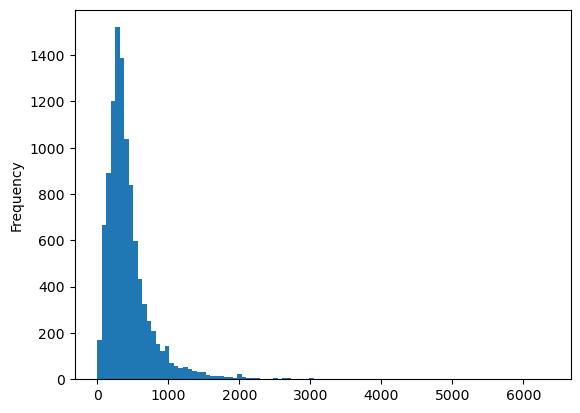

In [14]:
df['M_hmotnost'].plot.hist(bins=100)

In [15]:
df['M_hmotnost'].median()

354.0

In [16]:
df['M_počet_stran'].median()

208.0